In [4]:
from tester_rnn import Tester

In [5]:
tester = Tester(
    verbose=True,
    pair="BTCUSDT",
    difficulty="HIGH",
    use_fee=True,
    fee_maker=0.0002,
    fee_taker=0.0004,
    system="NETTING"
)

In [6]:
start = ["2023-10-01", "2023-08-01", "2023-12-10", "2023-11-01"]
end = ["2023-11-19", "2023-09-01", "2024-01-10", "2024-01-30"]
num = 1
tester.test_strategy(
    interval_of_candles="1h",
    start_date_utc=start[num],
    end_date_utc=end[num],
    initial_quote=500,
    initial_leverage=50
)

Trying to load info from directory...
Data loaded.
---------------------------------------------------------------------------
Testing strategy | BTCUSDT
---------------------------------------------------------------------------


/home/mauricio/.pyenv/versions/3.10.7/envs/bot/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


2023-08-08 02:00:00 | Selling 4939.9 quote for 29229.9, leverage 50
2023-08-08 02:00:00 |  Buying (closing) 4931.5 quote for 29180.5
2023-08-08 14:00:00 | Selling 5001.5 quote for 29420.5, leverage 50
2023-08-08 14:00:00 |  Buying (closing) 5000.7 quote for 29416.0
2023-08-10 05:00:00 | Selling 4971.7 quote for 29770.6, leverage 50
2023-08-10 05:00:00 |  Buying (closing) 4939.9 quote for 29580.4
2023-08-10 09:00:00 | Buying 5286.5 quote for 29369.3, leverage 50
2023-08-10 09:00:00 |  Selling (closing) 5319.0 quote for 29550.0
2023-08-10 11:00:00 | Buying 5580.5 quote for 29370.9, leverage 50
2023-08-10 11:00:00 |  Selling (closing) 5622.9 quote for 29594.3
2023-08-11 03:00:00 | Buying 5986.8 quote for 29347.1, leverage 50
2023-08-11 03:00:00 |  Selling (closing) 5997.1 quote for 29397.7
2023-08-11 05:00:00 | Buying 6045.7 quote for 29348.0, leverage 50
2023-08-11 05:00:00 |  Selling (closing) 6064.5 quote for 29439.4
2023-08-11 12:00:00 | Selling 6225.9 quote for 29647.2, leverage 50
2

8358.258559635526

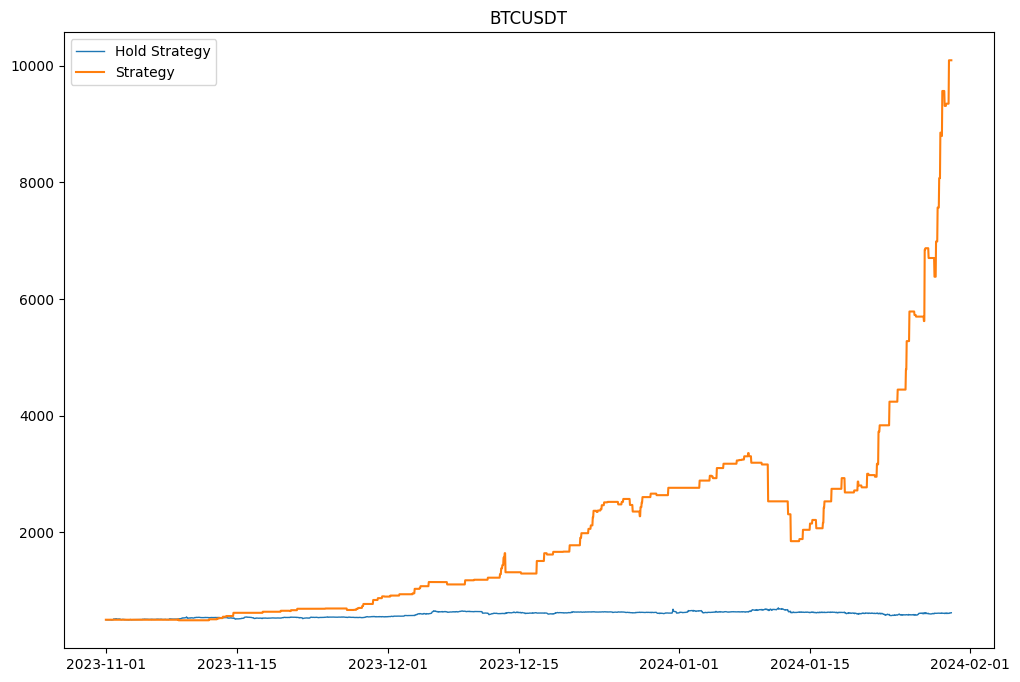

In [8]:
tester.plot_data(show_pos=False, cols=["Hold Strategy"])

In [9]:
tester.data.iloc[1]["Close"]

34497.3

In [7]:
tester.data.index[0]

Timestamp('2023-11-01 00:00:00')